In [126]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [331]:
newimg = cv2.imread('test13.jpg', 1)
newimghsv = cv2.cvtColor(newimg, cv2.COLOR_RGB2HSV)
newimggray = cv2.cvtColor(newimg, cv2.COLOR_RGB2GRAY)
cv2.imwrite('hsv.jpg', newimghsv)
cv2.imwrite('gray.jpg', newimggray)
b = np.ones(newimg.shape, np.uint8)

In [332]:
sigma = 2
T = 0.3
#newimg = np.array(newimg)

def calculate_filter_size(sigma, T):
    sHalf = round(np.sqrt(- np.log(T) * 2 * sigma**2))
    return sHalf

sHalf = calculate_filter_size(sigma, T)
size = (2 * sHalf) + 1
size = int(size)
x = np.arange(-sHalf, sHalf+1)
y = np.arange(-sHalf, sHalf+1)

def calculate_gradient(sHalf, sigma,x,y):
    
    [Y,X] = np.meshgrid(x,y)

    f = (np.exp(-(X**2 + Y**2)/(2*(sigma**2))))
        
    return f

f = calculate_gradient(sHalf, sigma, x, y)


f = f / np.sum(f)

def convfunction(f, newimghsv, size):
    
    h = newimghsv.shape[0]
    w = newimghsv.shape[1]
    height = h - size + 1
    width = w - size + 1
    
    newf = np.zeros((height, width, 3))
    
    for i in range (height):
        for j in range (width): 
            for a in range(size):
                for b in range(size):
                    newf[i][j] += f[a][b] * newimghsv[i + a][b + j]
    
    #newf = np.round(newf / 255)
    
    #cv2.imwrite('f.jpg', newf)
    
    return newf #, height, width

newf = cv2.GaussianBlur(newimghsv,(5,5),0)      

In [333]:
def filterout(newf, newimg):
    binary = newf.copy()
    a, b,c = binary.shape
    
    for y in range(0, a):
            for x in range(0, b):
                check = 0
                if ( (20 < newf[y][x][0] <40) and (50 <  newf[y][x][1] < 255) and (50 <  newf[y][x][2] < 255)):
                    check = 1
                if (200 <  newf[y][x][2] < 255):
                    check = 1
                if (check == 0):
                    binary[y][x][:] = 0
                    
    aaa = cv2.cvtColor(binary, cv2.COLOR_HSV2BGR)                
    cv2.imwrite('test1_filtered.jpg', aaa)            
    return binary  

filterout = filterout(newf, newimg)


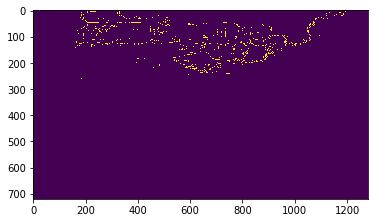

In [337]:
Ig = cv2.cvtColor(filterout, cv2.COLOR_RGB2GRAY)

edge = cv2.Canny(Ig, 100, 200)

cv2.imwrite('step4.jpg', edge)

plt.imshow(edge)
plt.show()

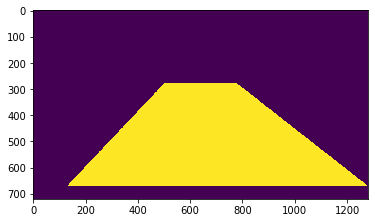

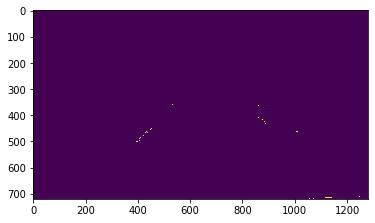

In [328]:
vertices = np.array([[[130, 670], [1280, 670], [780, 280], [500, 280]]], dtype=np.int32 )
shape = np.zeros([720,1280],dtype=np.uint8)
mask = cv2.fillPoly(shape, vertices, 255)
roi = edge.copy()

plt.imshow(mask)
plt.show()
#cv2.imwrite('shape.jpg', mask)

for x in range(0, 1280):
            for y in range(0, 710):
                if (mask[y,x] != 255):
                    roi[y,x] = 0

cv2.imwrite('test1_roi.jpg', roi)                    
plt.imshow(roi)
plt.show()

[[[ 395  499  577  317]]

 [[1057  717 1249  710]]

 [[ 412  494  448  456]]

 [[ 408  497  453  450]]

 [[1058  719 1231  710]]

 [[ 399  501  448  455]]]
-45.0
-2.0879838327233444
-46.548157698977974
-46.24536426676835
-2.9780206519497523
-43.191260677507934


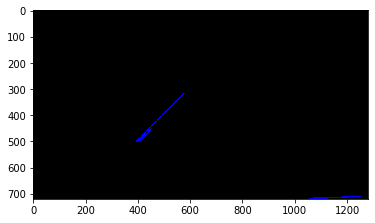

In [330]:
minLineLength =5
maxLineGap = 200
theta = 1*np.pi/180
lines = cv2.HoughLinesP(roi, 2, theta, 30, np.array([]), minLineLength, maxLineGap)
print(lines)
check = 0

final_image = np.zeros(newimg.shape, np.uint8)

#for lines in range(0, len(lines)):
for i in lines:
    x1, y1, x2, y2 = i[0]   
    angles = np.arctan2(y2 - y1, x2 - x1) * 180 / np.pi
    print(angles)
    if (angles < 0):
        if (angles < 0):
            check = 1
    
    elif (35 < angles < 47):
        check = 1
    
    if (check == 1):
        cv2.line(final_image, (x1, y1), (x2, y2), (0, 0, 255), 3)
        
output = cv2.addWeighted(newimg, 0.8, final_image, 1, 0)
cv2.imwrite('test1_output.jpg', output)         
plt.imshow(final_image)
plt.show()